# Ex4

Implemente uma função para realizar Transformações Geométricas de forma inversa baseadas em matrizes de coordenadas homogêneas. Exemplifique o uso do seu código por meio de diferentes de matrizes para realização das operações:
1. Translação
2. Escala
3. Rotação
4. Cisalhamento

In [ ]:
import numpy as np
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt
import math

In [ ]:
# get translation matrix
def getTranslation(tx, ty):
  return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
  ])

In [ ]:
# get scaling matrix
def getScaling(s):
  return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1] 
  ])

In [ ]:
# get rotation matrix
def getRotation(theta):
  theta = math.radians(theta)
  return np.array([
        [np.cos(theta), -np.sin(theta), 0], 
        [np.sin(theta), np.cos(theta), 0], 
        [0,0,1]
  ])

In [ ]:
# get shear matrix
def getShear(sv, sh):
  return np.array([
        [1, sv, 0], 
        [sh, 1, 0], 
        [0 , 0, 1]
  ])

In [ ]:
# get identity matrix
def getIdentity():
  return np.array([
        [1, 0, 0], 
        [0, 1, 0], 
        [0, 0, 1]
  ])

In [ ]:
# scale a image with given height and width
def scale(im, nH, nW):
  _height = len(im)
  _width = len(im[0]) 
  _list = [[ im[int(_height * r / nH)][int(_width * c / nW)]  
             for c in range(nW)] for r in range(nH)]
  return np.asarray(_list)

In [ ]:
# transform an image with a given identity transformation matrix
def transform(identity, image):
  width, height = image.shape[0], image.shape[1]
  new_img = np.zeros(shape=image.shape, dtype = int)
  for i in range(width):
    for j in range(height):
      newpos = np.matmul(identity, [i, j, 1]).astype(int)
      if newpos[0] >= 0 and newpos[0] < new_img.shape[0] and newpos[1] >= 0 and newpos[1] < new_img.shape[1]:
        new_img[newpos[0], newpos[1]] = image[i, j]
  return new_img

In [ ]:
# get test image
image_aux = data.camera()

In [ ]:
# scale to 256x256
image = scale(image_aux, 256, 256)

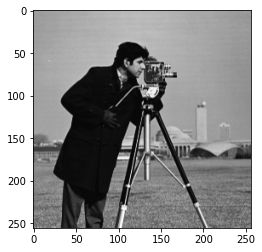

In [ ]:
# show image
plt.imshow(image, cmap='gray')

In [ ]:
# get image width and height
width, height = image.shape[0], image.shape[1]

**Translation with width=-50 and height=100**

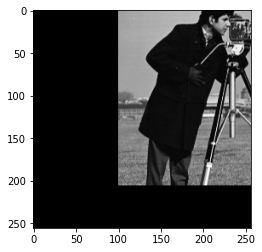

In [ ]:
# get translation matrix with translation width=-50 and height=100
identity = np.matmul(getIdentity(), getTranslation(-50, 100))
# get image transformed
image1 = transform(identity, image)
# show new image
plt.imshow(image1, cmap='gray')

**Scaling with 1.5x**

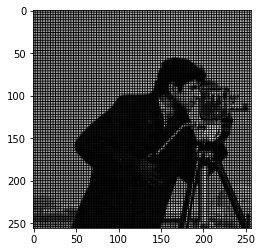

In [ ]:
# get translation matrix with scaling=1.5x
identity = np.matmul(getIdentity(), getScaling(1.5))
# get image transformed
image2 = transform(identity, image)
# show new image
plt.imshow(image2, cmap='gray')

**Rotating with 15°**

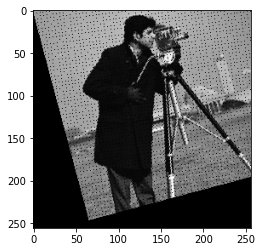

In [ ]:
# get translation matrix with rotation=15°
identity = np.matmul(getIdentity(), getRotation(15))
# get image transformed
image3 = transform(identity, image)
# show new image
plt.imshow(image3, cmap='gray')

**Shearing with vertical=0.2 and horizontal=0.1**

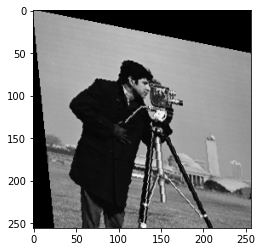

In [ ]:
# get translation matrix with shear vertical=0.2 and horizontal=0.1
identity = np.matmul(getIdentity(), getShear(0.2, 0.1))
# get image transformed
image4 = transform(identity, image)
# show new image
plt.imshow(image4, cmap='gray')